In [2]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions","Plots","Statistics","Turing","StatsPlots"])

  Activating project at `~/Documents/programming/BME-502-2025`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [3]:
using Turing, Statistics, Plots, StatsPlots, Distributions

In [4]:
nd = Normal(2,1)

Normal{Float64}(μ=2.0, σ=1.0)

In [5]:
x = rand(nd,100)

100-element Vector{Float64}:
  1.744832941276986
  0.9936316460688817
  1.8522547955155644
  1.146654244806636
  0.9634001909112639
  1.546906972216238
  1.6380408080916449
  1.6228201365038792
  1.7938037582205288
  1.9313082528299297
  0.4215572853238554
  3.123772620278242
  2.5512168832318154
  ⋮
 -0.17113783331421262
  3.234510577431328
  4.37101430719485
  2.5938227039752855
  2.3586092921204616
  1.9964121199523526
  1.6811350874631246
  0.8034210015067267
  1.665602373856594
  2.07884370205662
  0.7555014846631145
  1.2476630435110536

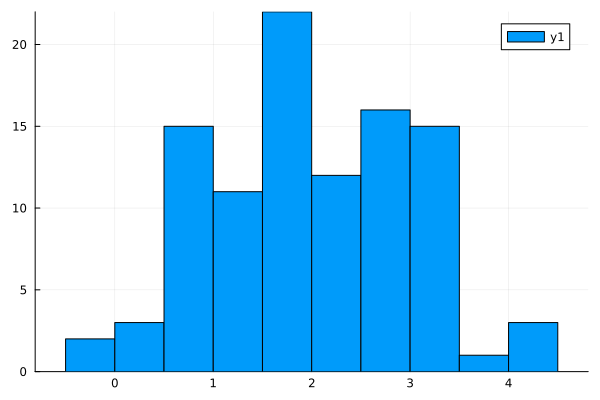

In [6]:
histogram(x,bins=10)

In [7]:
@model function gauss_dist(x)
    μ ~ Uniform(-10,10)
    σ ~ Uniform(0.01,10)
    for i in length(x)
        x[i] ~ Normal(μ,σ)
    end
end

gauss_dist (generic function with 2 methods)

In [8]:
mymodel = gauss_dist(x)

DynamicPPL.Model{typeof(gauss_dist), (:x,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.gauss_dist, (x = [1.744832941276986, 0.9936316460688817, 1.8522547955155644, 1.146654244806636, 0.9634001909112639, 1.546906972216238, 1.6380408080916449, 1.6228201365038792, 1.7938037582205288, 1.9313082528299297  …  4.37101430719485, 2.5938227039752855, 2.3586092921204616, 1.9964121199523526, 1.6811350874631246, 0.8034210015067267, 1.665602373856594, 2.07884370205662, 0.7555014846631145, 1.2476630435110536],), NamedTuple(), DynamicPPL.DefaultContext())

In [9]:
chain = Turing.sample(mymodel, NUTS(0.65),5000)

┌ Info: Found initial step size
└   ϵ = 2.0

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00

Chains MCMC chain (5000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 4.33 seconds
Compute duration  = 4.33 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

           μ    1.0607    3.6912    0.0722   2599.0039   1459.5273    1.0030   ⋯
           σ    4.4097    2.8734    0.3396     48.6895     19.5375    1.0012   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

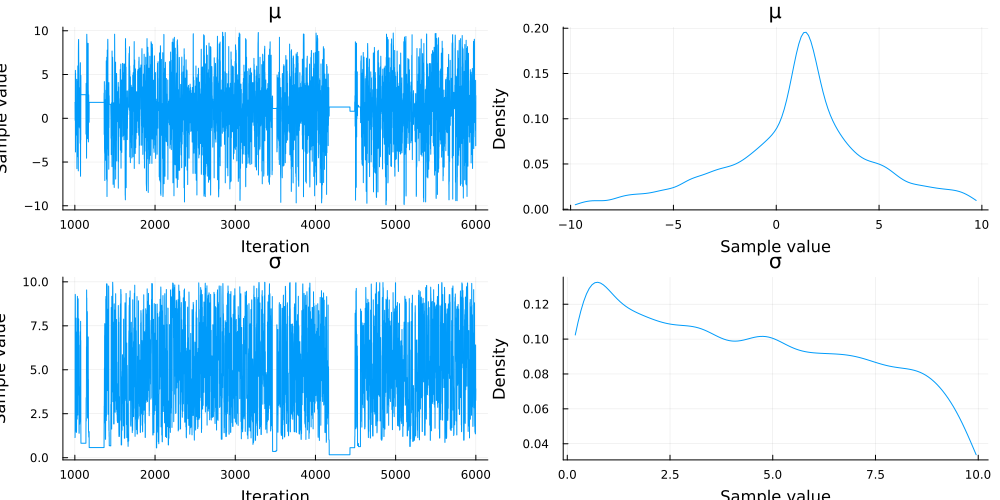

In [10]:
plot(chain)

In [11]:
nd2 = Normal(4,1)

Normal{Float64}(μ=4.0, σ=1.0)

In [12]:
y = rand(nd2,200)

200-element Vector{Float64}:
 5.0386107691003446
 4.443156019762518
 2.495506200321138
 3.4613729579131207
 3.0488253996141212
 6.594560327249036
 2.4117261650727926
 4.312722144824909
 3.0873976209637313
 3.7432723434563715
 4.818499730084607
 2.546237453453332
 2.6324348414076635
 ⋮
 5.325302117430616
 6.2132105359804815
 5.500271748729013
 3.0523878211696043
 3.5626944277070165
 4.240643197863338
 4.756776134551193
 5.060825014035344
 3.0159618944999713
 4.319119168060733
 3.349643714005402
 4.468804802315013

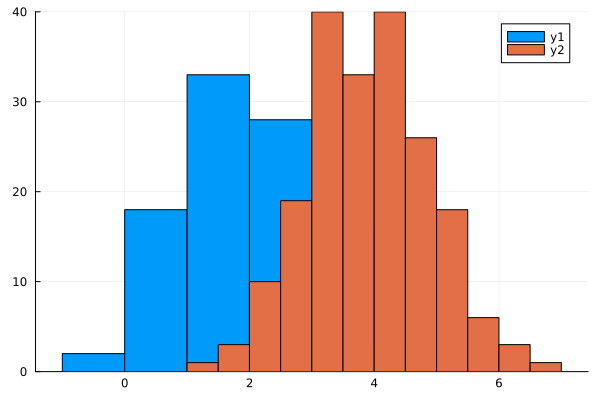

In [13]:
histogram(x)
histogram!(y)

In [14]:
@model function t_test(x,y)
    μ ~ Uniform(-20,20)
    Δμ ~ Uniform(-5,5)
    σ1 ~ Uniform(0.01,3)
    σ2 ~ Uniform(0.01,3)
    for i in length(x)
        x[i] ~ Normal(μ-Δμ/2,σ1)
    end
    for i in length(y)
        y[i] ~ Normal(μ+Δμ/2,σ2)
    end
end

t_test (generic function with 2 methods)

In [15]:
myttest = t_test(x,y)

DynamicPPL.Model{typeof(t_test), (:x, :y), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.t_test, (x = [1.744832941276986, 0.9936316460688817, 1.8522547955155644, 1.146654244806636, 0.9634001909112639, 1.546906972216238, 1.6380408080916449, 1.6228201365038792, 1.7938037582205288, 1.9313082528299297  …  4.37101430719485, 2.5938227039752855, 2.3586092921204616, 1.9964121199523526, 1.6811350874631246, 0.8034210015067267, 1.665602373856594, 2.07884370205662, 0.7555014846631145, 1.2476630435110536], y = [5.0386107691003446, 4.443156019762518, 2.495506200321138, 3.4613729579131207, 3.0488253996141212, 6.594560327249036, 2.4117261650727926, 4.312722144824909, 3.0873976209637313, 3.7432723434563715  …  5.500271748729013, 3.0523878211696043, 3.5626944277070165, 4.240643197863338, 4.756776134551193, 5.060825014035344, 3.0159618944999713, 4.319119168060733, 3.349643714005402, 4.468804802315013]), NamedTuple(), DynamicPPL.DefaultContext())

In [16]:
chain = sample(myttest,NUTS(0.65),10000)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (10000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 3.18 seconds
Compute duration  = 3.18 seconds
parameters        = μ, Δμ, σ1, σ2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

           μ    2.8945    1.1340    0.0248   2029.3445   2696.7142    1.0004   ⋯
          Δμ    2.3270    1.8152    0.0381   2129.0202   2893.3835    1.0007   ⋯
          σ1    1.5043    0.8295    0.0242    831.7923    321.3673    1.0016   ⋯
          σ2    1.4517    0.8671    0.0290    660.6364    222.2041    1.0001   ⋯
                                                         

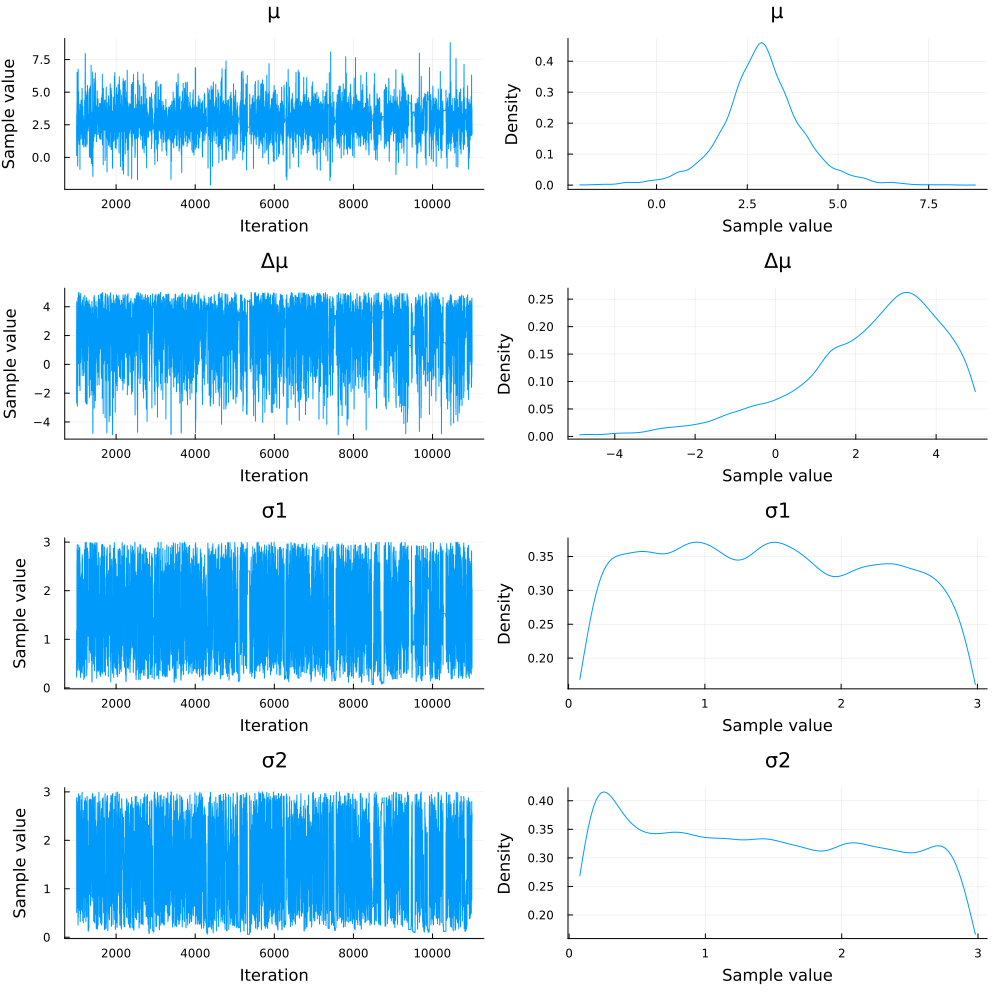

In [17]:
plot(chain)

In [18]:
deltamu = vec(chain[:Δμ])

10000-element reshape(::AxisArrays.AxisMatrix{Float64, Matrix{Float64}, Tuple{AxisArrays.Axis{:iter, StepRange{Int64, Int64}}, AxisArrays.Axis{:chain, UnitRange{Int64}}}}, 10000) with eltype Float64:
  2.3964189325226384
 -2.6860777627918644
  1.031967197195267
  4.3528931522752
  4.213448678133918
  4.213448678133918
  3.1923697459023863
  1.400246361716282
  1.3751336804270675
  0.9042448829725211
  2.5341008729100363
  0.8199034661153162
  3.0303833022808906
  ⋮
  3.590226011634435
  3.531700048593203
 -0.2905294200854476
  2.7273080488789
 -0.8651596044357044
  4.586607177774992
  4.596841747719049
  4.301367028632503
  3.5429375694206175
  2.850919652682805
  2.0047815989077726
  0.1018065198438336

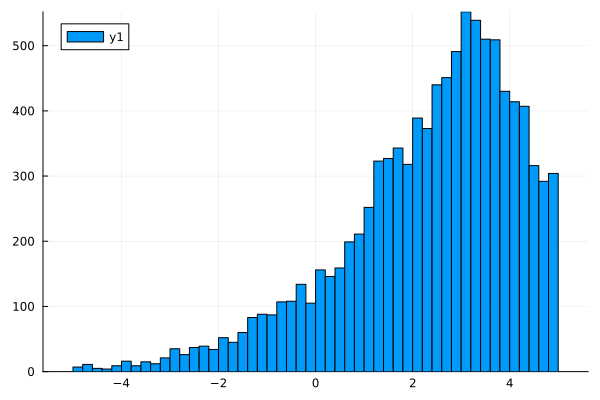

In [19]:
histogram(deltamu)

In [20]:
# Lets see how we can handle non-Gaussian distributions
xs = rand(SkewNormal(2, 1, 4),100)
ys = rand(SkewNormal(4, 1, -4),100)

100-element Vector{Float64}:
 3.4188220066885098
 3.664497922415107
 2.220636891124803
 3.290979943083555
 3.6556704155582573
 3.069732297406535
 3.7699696377218967
 3.7792580212607114
 3.077599383147267
 2.7173842159235533
 2.519521086601406
 3.6205860332692947
 3.9860907829495495
 ⋮
 4.022581149022292
 3.2983026707190497
 2.6647615657026043
 2.6455140167389737
 3.6439077902638313
 2.991677879559469
 2.2492149001937767
 3.4217896771065233
 3.932830451004776
 3.093748237957655
 3.135795297371998
 4.161266878897884

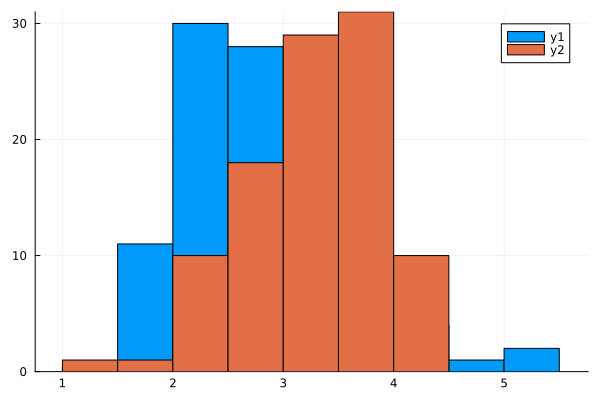

In [21]:
histogram(xs)
histogram!(ys)

In [22]:
@model function whatsthedifference(x,y)
    α1 ~ Uniform(-10,10)
    α2 ~ Uniform(-10,10)
    μ ~ Uniform(-20,20)
    Δμ ~ Uniform(-7,7)
    σ1 ~ Uniform(0.01,3)
    σ2 ~ Uniform(0.01,3)
    for i in length(x)
        x[i] ~ SkewNormal(μ-Δμ/2,σ1,α1)
    end
    for i in length(y)
        y[i] ~ SkewNormal(μ+Δμ/2,σ2,α2)
    end
end

whatsthedifference (generic function with 2 methods)

In [23]:
mywtd = whatsthedifference(xs,ys)

DynamicPPL.Model{typeof(whatsthedifference), (:x, :y), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.whatsthedifference, (x = [2.552278047726859, 3.085439793886076, 3.2672299902378974, 3.719637088723155, 2.7985975670811865, 2.2140641690442155, 2.1979788315551665, 2.662824704447534, 2.5683915599471945, 1.801860089363538  …  2.793325153636622, 3.455952546081398, 2.587862658434294, 2.615490850783146, 2.3736081181865427, 2.7734022901191135, 2.063852882411278, 4.148105520387119, 2.7132332177626246, 1.887946315507444], y = [3.4188220066885098, 3.664497922415107, 2.220636891124803, 3.290979943083555, 3.6556704155582573, 3.069732297406535, 3.7699696377218967, 3.7792580212607114, 3.077599383147267, 2.7173842159235533  …  2.6647615657026043, 2.6455140167389737, 3.6439077902638313, 2.991677879559469, 2.2492149001937767, 3.4217896771065233, 3.932830451004776, 3.093748237957655, 3.135795297371998, 4.161266878897884]), NamedTuple(), DynamicPPL.DefaultConte

In [24]:
chain_wtd = sample(mywtd, NUTS(0.65),5000)

┌ Info: Found initial step size
└   ϵ = 0.05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (5000×18×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 3.34 seconds
Compute duration  = 3.34 seconds
parameters        = α1, α2, μ, Δμ, σ1, σ2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk    ess_tail      rhat    ⋯
      Symbol   Float64   Float64   Float64    Float64     Float64   Float64    ⋯

          α1   -0.1963    5.8380    0.4664   222.7645    722.9792    1.0185    ⋯
          α2   -0.0335    5.8585    0.3460   257.0320    199.6212    1.0137    ⋯
           μ    2.9750    1.2253    0.0564   446.3448    996.9131    1.0016    ⋯
          Δμ    2.0865    2.1782    0.0913   542.9247   1051.5963    1.0029    ⋯
          σ1    1.5174    0.8433    0.0730   107.776

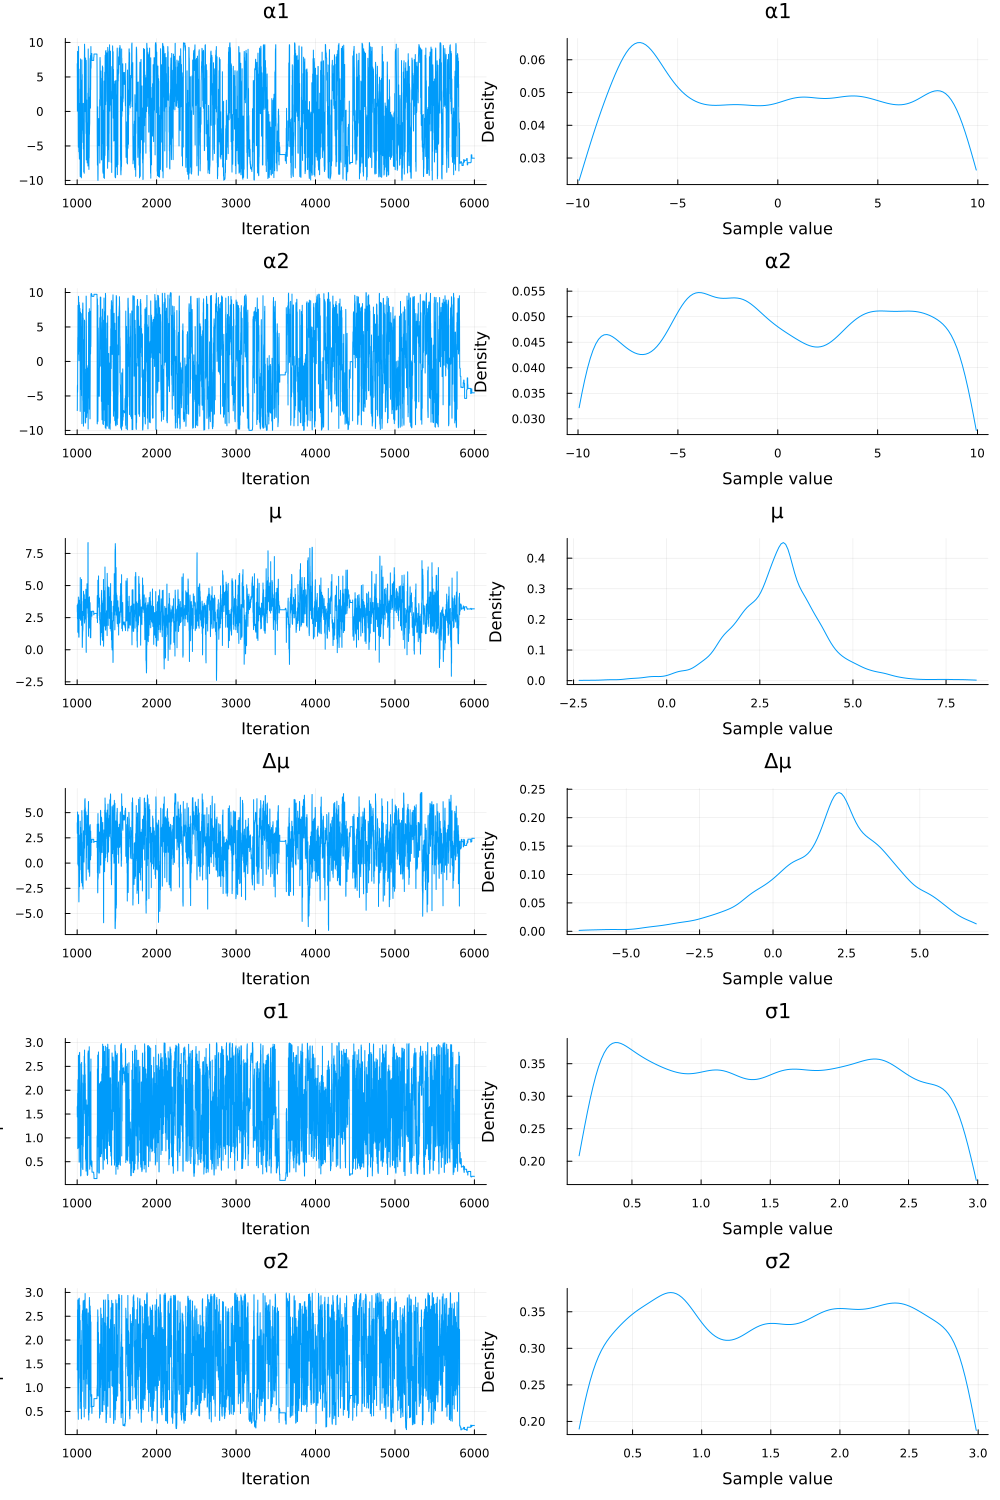

In [26]:
plot(chain_wtd)

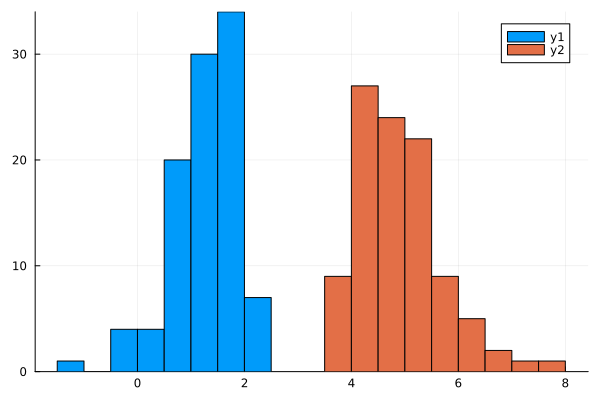

In [34]:
xs2 = rand(SkewNormal(2, 1, -4),100)
ys2 = rand(SkewNormal(4, 1, 4),100)
histogram(xs2)
histogram!(ys2)

In [28]:
mywtd2 = whatsthedifference(xs2,ys2)

DynamicPPL.Model{typeof(whatsthedifference), (:x, :y), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.whatsthedifference, (x = [-0.4253024257476872, 1.5587174379069177, 1.1585310481412652, 2.249083626466607, 0.4959344401489254, 1.3743465757436175, 0.6963949271838958, 1.945328229597989, 1.4997363252904623, 1.7170653966681473  …  1.5051235876359215, 1.946104360349532, 2.0464747033238355, 1.4889864069581986, 0.4019696376437225, 1.493083594914487, -0.35660688289837683, 1.891890178944284, 0.49389745293501197, 1.4900718144173308], y = [5.0798140275397135, 5.475676473981535, 4.460429570249531, 5.3479600628522075, 4.232634003705157, 5.672942313761954, 5.052987178237027, 4.795374208513727, 5.608132667598424, 3.9875290019308  …  5.459699269530201, 3.8608993892335612, 5.224372211448747, 4.411621257935425, 5.426777080463788, 4.927428554572358, 4.20722622940922, 4.4051121169591525, 4.227643894066699, 4.793012881212363]), NamedTuple(), DynamicPPL.DefaultCon

In [29]:
chain_wtd2 = sample(mywtd2,NUTS(0.65),5000)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (5000×18×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 0.68 seconds
Compute duration  = 0.68 seconds
parameters        = α1, α2, μ, Δμ, σ1, σ2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          α1   -0.7876    5.8589    0.6568    89.6324   276.3765    1.0073     ⋯
          α2   -0.3717    5.5776    0.3736   241.8800   446.9591    1.0275     ⋯
           μ    3.1866    1.0778    0.0572   339.2006   881.6952    1.0060     ⋯
          Δμ    2.9499    1.9227    0.0965   384.1114   859.0291    1.0077     ⋯
          σ1    1.4212    0.8296    0.0781   115.566

In [30]:
mean(rand(SkewNormal(2, 1, -4),10000))

1.2283271428831062

In [31]:
mean(rand(SkewNormal(4, 1, 4),10000))

4.768099897107517